# **Project Name**    -  **TED Talks Views Prediction**



##### **Project Type**    - **Regression**
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

TED=Technology Entertainment And Design

TED is an unprofitable organisation that post videos online in Free. TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000+ TED talks including transcripts in many languages. It was basically started as a conference in 1984 that designed by Richard saul wurman but due to some reasons it was unsuccesful. After 6 years in 1990 ,it back with a bang. In TED, speaker share their views and ideas to the society in 18 minutes. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,  Shahrukh Khan, and Bill Gates.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/padhilipika



# **Problem Statement**


**Write Problem Statement Here.**


In today's digital age, TED Talks have emerged as a prominent platform for sharing innovative ideas, insightful perspectives, and inspiring stories with a global audience. With millions of viewers engaging with these talks, the ability to predict the number of views a TED Talk might garner is a valuable endeavor. This project aims to develop a predictive model that can accurately forecast the views a TED Talk is likely to receive based on various features associated with the talk itself, the speaker's profile, and the content presented.

The primary objective of this project is to create a machine learning model that can predict the number of views a TED Talk will accumulate within a specific time frame after its publication. To achieve this, the following key tasks need to be addressed:

Data Collection and Preprocessing: Gather a comprehensive dataset of TED Talks, encompassing features such as the title, description, speaker's occupation, talk duration, publication date, and more. Additionally, collect information about the speaker's background, including their previous TED Talk history and profession.

Exploratory Data Analysis (EDA): Perform an in-depth analysis of the dataset to identify trends, correlations, and patterns that might impact the views a TED Talk receives. This step will guide the selection of features for the predictive model.

Model Selection and Training: Experiment with various machine learning algorithms such as linear regression, decision trees, random forests, gradient boosting, and neural networks. Train and fine-tune these models using appropriate methodologies like cross-validation and hyperparameter tuning.


#### **Define Your Business Objective?**

Answer Here.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [220]:
%pip install pandas numpy matplotlib seaborn plotly statsmodels scikit-learn xgboost missingno nbformat --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\lipik\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [221]:
# Import Libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [222]:
# Load Dataset
df = pd.read_csv('data/datatedtalks.csv')

### Dataset First View

In [223]:
# Dataset First Look
# Dataset First Look (Viewing the first 5 rows)
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [224]:
# Dataset First Look( Viewing the last 5 rows)
df.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


### Dataset Rows & Columns count

In [225]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

In [226]:
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 4005  
number of columns : 19


### Dataset Information

In [227]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [228]:
# Dataset Duplicate Value Count
value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [229]:
# Missing Values/Null Values Count
print(df.isnull().sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


<Axes: >

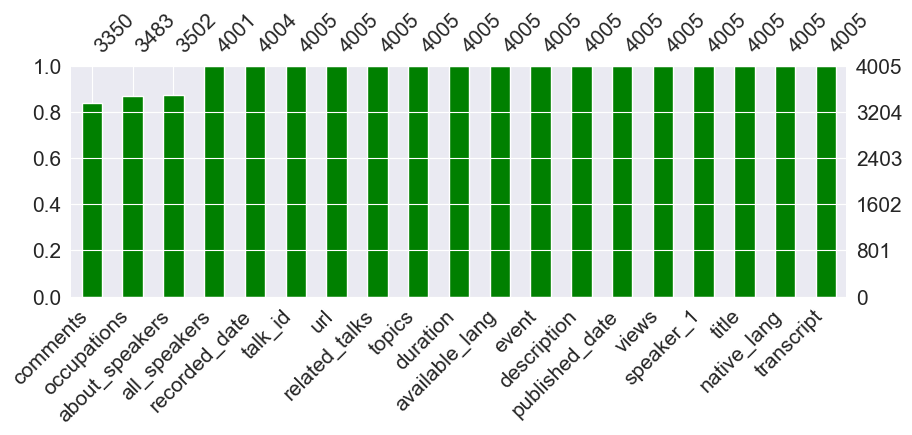

In [230]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

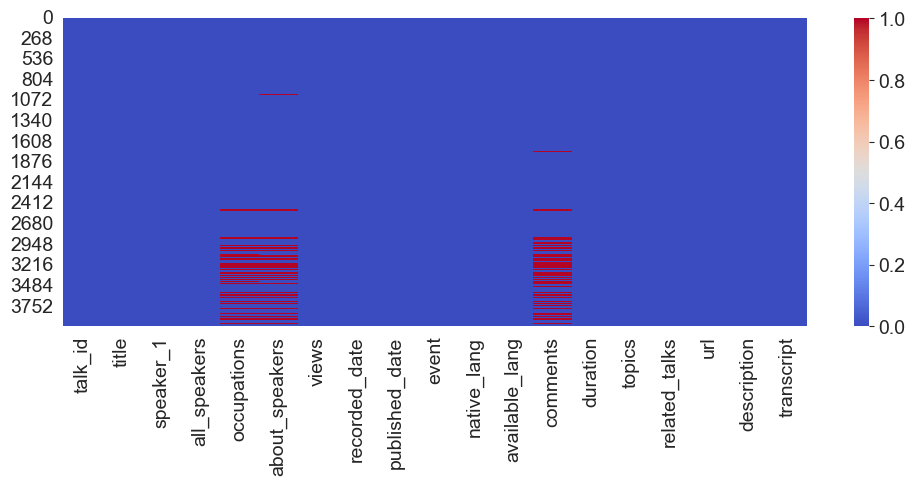

In [231]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

Answer Here

The given dataset is  play a crucial role in building predictive models that estimate the number of views a TED Talk is likely to receive based on various input features. Regression is a type of supervised machine learning technique that is used for predicting continuous numerical values. In the case of TED Talk views prediction, the target variable is the number of views, and regression models aim to find a relationship between the input features and this target variable.

There are 4005  rows and 19 columns in the dataset.The dataset does not contain any duplicate values.

 comments , occupations and about_speakers columns are high missing values.

The comments attributes has a lot of NaN values(655) to deal with. We have used some basic intution for what could be the reason of comments being null. The most logical explanation could be that the comments are disabled for the video. The other reason that could be possible is the data inconsistency so there could be some issues with the survey that are possibly causing these inconsistencies. We'll deal with these NaN values later on.



## ***2. Understanding Your Variables***

In [232]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [233]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

Answer Here


* **`talk_id:`** A unique identifier for each TED Talk video.

* **`title:`** The title of the talk.

* **`speaker_1:`** The primary speaker for the talk.

* **`all_speakers:`** A list of all the speakers for the talk.

* **`occupations:`** The occupations of the speakers.

* **`about_speakers:`** Information about the speakers, such as their backgrounds and expertise.

* **`views:`** The number of views the video has received.

* **`recorded_date:`** The date the talk was recorded.

* **`published_date:`** The date the talk was published on the TED Talks YouTube channel.

* **`event:`** The name of the TED event where the talk was given.

* **`native_lang:`** The language the talk was given in.

* **`available_lang:`** The languages the talk is available in.

* **`duration:`** The length of the video.(in sec.)

* **`topics:`** The topics covered in the talk.

* **`related talks:`** Other TED Talks that are related to this talk.

* **`url:`** The URL of the video.

* **`description:`** A brief description of the talk.

* **`transcript:`** A transcript of the talk. **bold text**

### Check Unique Values for each variable.

In [234]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in talk_id is 4005
No. of unique values in title is 4005
No. of unique values in speaker_1 is 3274
No. of unique values in all_speakers is 3306
No. of unique values in occupations is 2049
No. of unique values in about_speakers is 2977
No. of unique values in views is 3996
No. of unique values in recorded_date is 1334
No. of unique values in published_date is 2962
No. of unique values in event is 459
No. of unique values in native_lang is 12
No. of unique values in available_lang is 3902
No. of unique values in comments is 601
No. of unique values in duration is 1188
No. of unique values in topics is 3977
No. of unique values in related_talks is 4005
No. of unique values in url is 4005
No. of unique values in description is 4005
No. of unique values in transcript is 4005


## 3. ***Data Wrangling***

### Data Wrangling Code

In [235]:
# Write your code to make your dataset analysis ready.
# Dataset First Look (Viewing the first 5 rows)
df.head()
# Dataset last Look (Viewing the first 5 rows)
df.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [236]:
# describe the numerical dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [237]:
df.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99])

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
80%,24402.600000,2.475286e+06,227.000000,1020.000000
85%,32189.400000,3.019490e+06,275.000000,1072.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000


The minimum value of views is 0.

The minimum value of comments is also 0.

Outliers in views, comments and duration columns.

In [238]:
# find rows where column comments have 0 value

df[df['comments']==0.0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


2 rows present where comments = 0 value

In [239]:
# find rows where column views have 0 value

df[df['views']==0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


Total 6 rows are present where views = 0 and columns = NaN. this is   missing completely at random data so we can remove this rows. because this is impossible that the views of video are 0 on TEDx Website.


Total 655 NaN values present in comments column so we have to fill that value also.

In [240]:
df.describe(include='O').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


### What all manipulations have you done and insights you found?

Answer Here.

Comments , occupations and about_speakers columns are high missing values.we have to fill 655 missing values of comments. completion issue(missing data).


Incorrect data-type assigned to recorded_date , published_date , comments. validity issue(invalid data).


The minimum value of column views is 0 and there are total 6 rows. so we have to delete that rows. accuracy issue(not accurate values).


The minimum value of comments is also 0. there are only 2 rows there but null value in other 655 rows so simply fill with 0 but this column important so we fill values in feature engineering part.  accuracy issue(not accurate values).



URL and talk_id column is also not useful in EDA so we deleted accuracy issue(not accurate values).



Topics and available_lang are in list format. we have to split this untidy
 data for better feature corr with views. we perform this in feature transformation part.


There are also few columns in dictionary untidy format occupations,about_speakers, related_talks but this columns are not important so in later feature transformation part we remove this columns if needed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='comments', ylabel='views'>

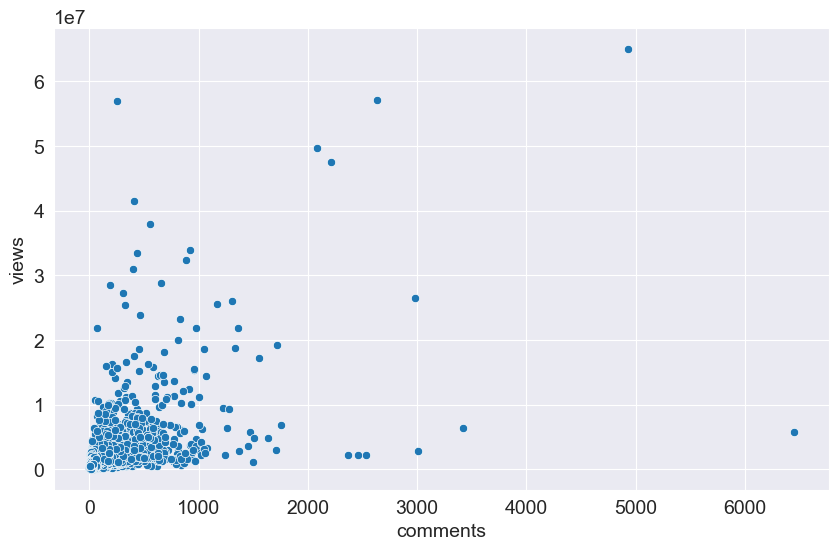

In [241]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(x='comments', y='views', data=df)


<Axes: xlabel='duration', ylabel='views'>

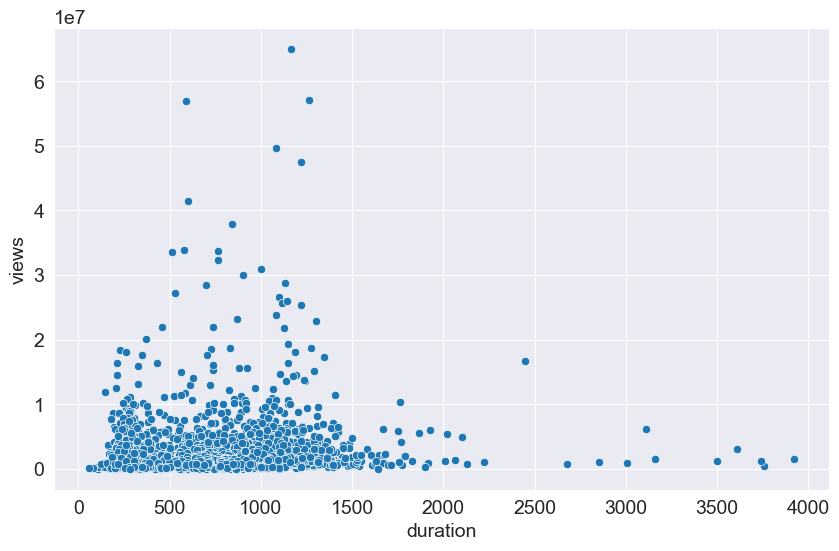

In [242]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='views', data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

 A scatter plot is a type of data visualization that displays individual data points as dots on a two-dimensional plane.It displays individual data points as dots on a two-dimensional plane .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the above graph it is clear that comments and views both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

Also as previously seen comments have a lot of NaN values and also distribution is highly skewed to the right side indicating some outliers. So lets deal with those issues too.

From the above graph it is clear that duration and views columns are not    correlated to each other.In duration column also some outlier there.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Yes the gained insights help creating a positive business impact by guiding content strategy and engagement efforts.

#### Chart - 2

<Axes: xlabel='comments', ylabel='Density'>

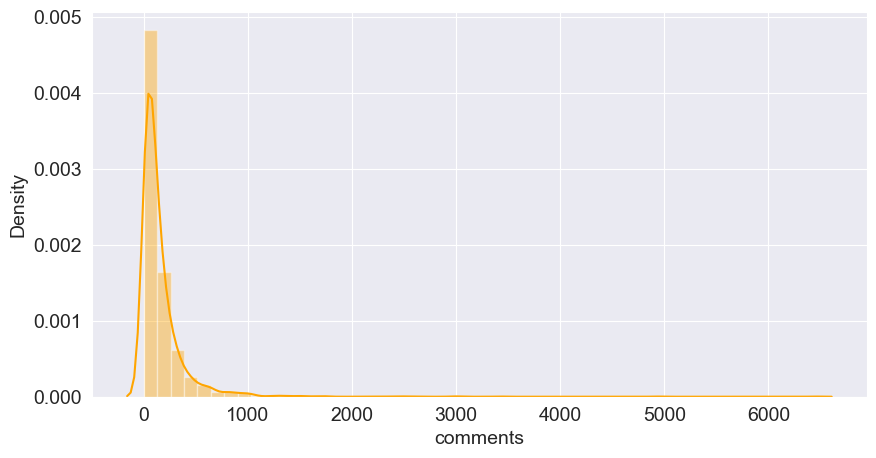

In [243]:
# Chart - 2 visualization code
# check distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color ='orange')

In [244]:
print(len(df[df['comments'] > 1100]))

29


##### 1. Why did you pick the specific chart?

Answer Here.

Histogram is useful for understanding the overall distribution, central tendency, and spread of the 'comments' variable. It can help you identify whether the comments are concentrated within a specific range or if they are spread out across a wider range of values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The comments column is also highly right skew.we have to apply log transformation when we make pipeline.

There are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of comments .

#### Chart - 3

<Axes: xlabel='comments', ylabel='Density'>

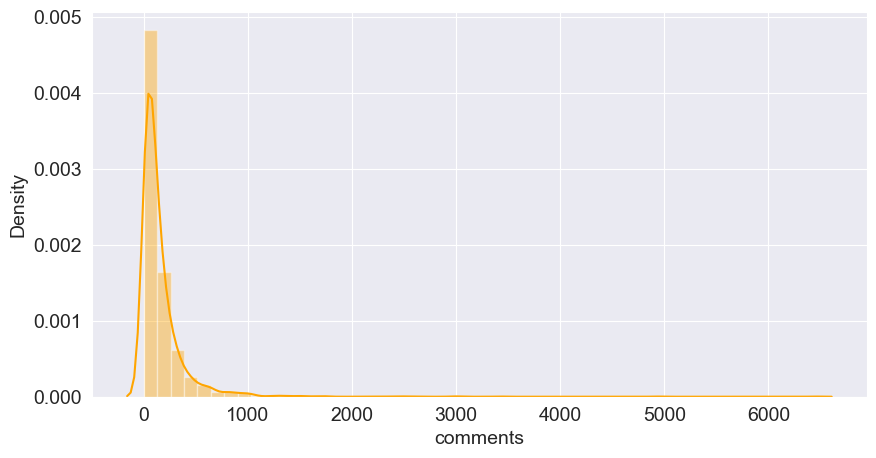

In [245]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color ='orange')

##### 1. Why did you pick the specific chart?

Answer Here.

Histogram is useful for understanding the overall distribution, central tendency, and spread of the 'comments' variable. It can help you identify whether the comments are concentrated within a specific range or if they are spread out across a wider range of values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

After deal with outliers and null values now distribution of column comments are right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of comments .

#### Chart - 4

<Axes: xlabel='views', ylabel='Density'>

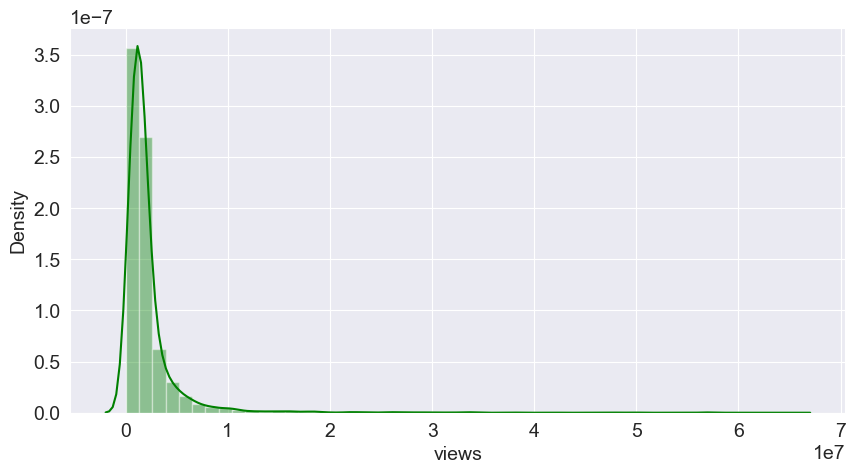

In [246]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.distplot(df['views'], color ='green')


<Axes: xlabel='duration', ylabel='Density'>

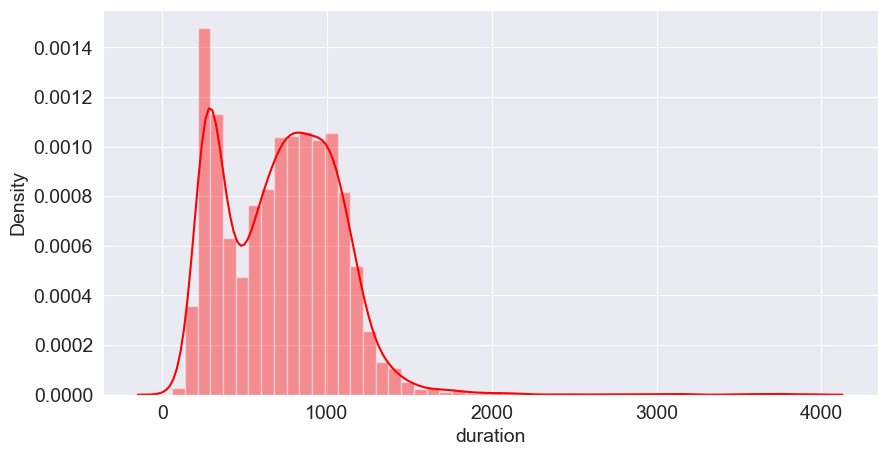

In [247]:
plt.figure(figsize=(10,5))
sns.distplot(df['duration'], color ='red')

##### 1. Why did you pick the specific chart?

Answer Here.

Histogram with KDE Plot chart is used to visualize the distribution of the 'views' variable, showing how the views are spread across different ranges.The histogram component displays the frequency or count of TED Talks falling into different ranges of views. The KDE plot overlay provides a smoothed estimate of the probability density function of the data, giving you an idea of the underlying distribution shape.In a regression project, using a histogram with a KDE plot can help to understand the distribution of the target variable . This visualization can be particularly helpful when deciding how to approach the regression analysis and model selection. It gives  an overview of whether the target variable follows a normal distribution, is skewed, or has other patterns that might influence  choice of regression algorithm and preprocessing steps.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The views column is highly right skew..we have to apply log transformation when we make pipeline.

There are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the insights help creating a positive impact as this insight can help TED organizers understand the typical range of views to expect and tailor their marketing and promotional strategies accordingly

#### Chart - 5

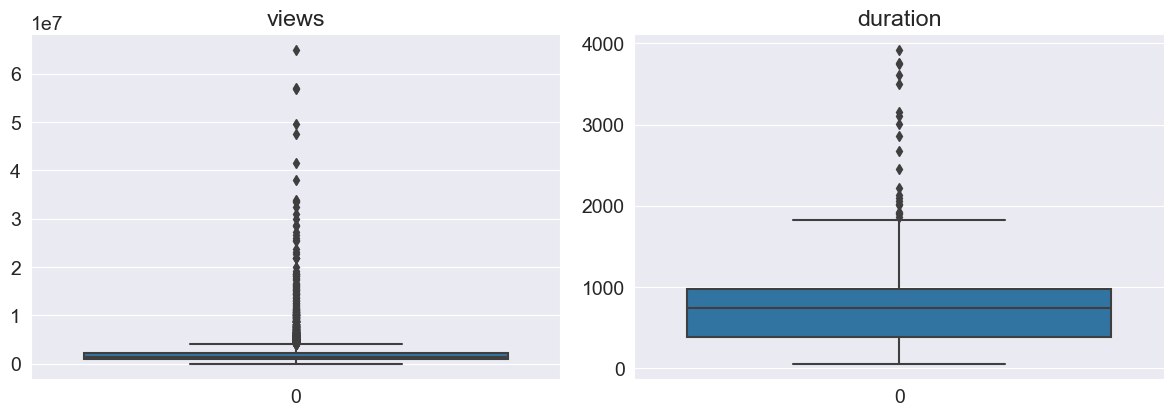

In [248]:
# Chart - 5 visualization code
# checking duration and views columns Outliers using boxplot
columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

In [249]:
# treatment outliers by mean

columns = ['views', 'duration']

for i in columns:
  iqr = df[i].quantile(0.75)-df[i].quantile(0.25)
  df[i] = df[i].mask(df[i]>(df[i].quantile(0.75)+1.5*iqr),df[i].mean())

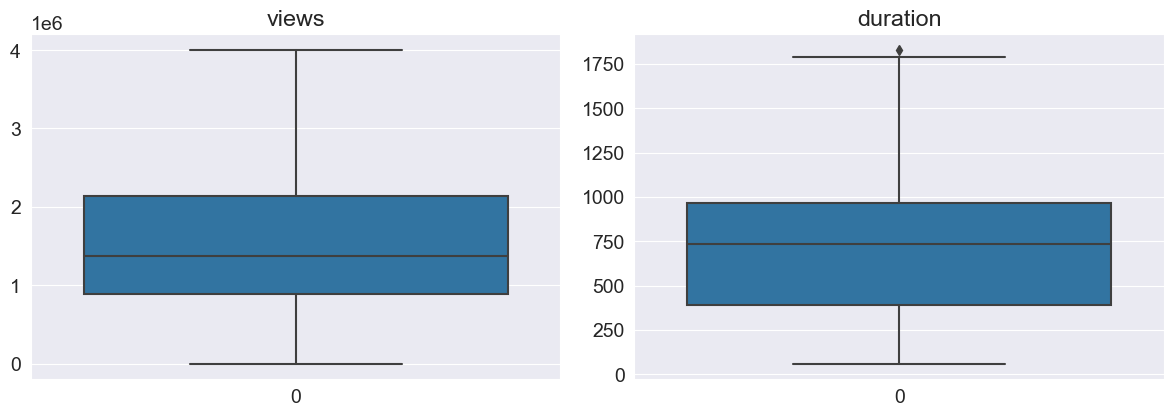

In [250]:
#let's see the numerical column again after treating outliers

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

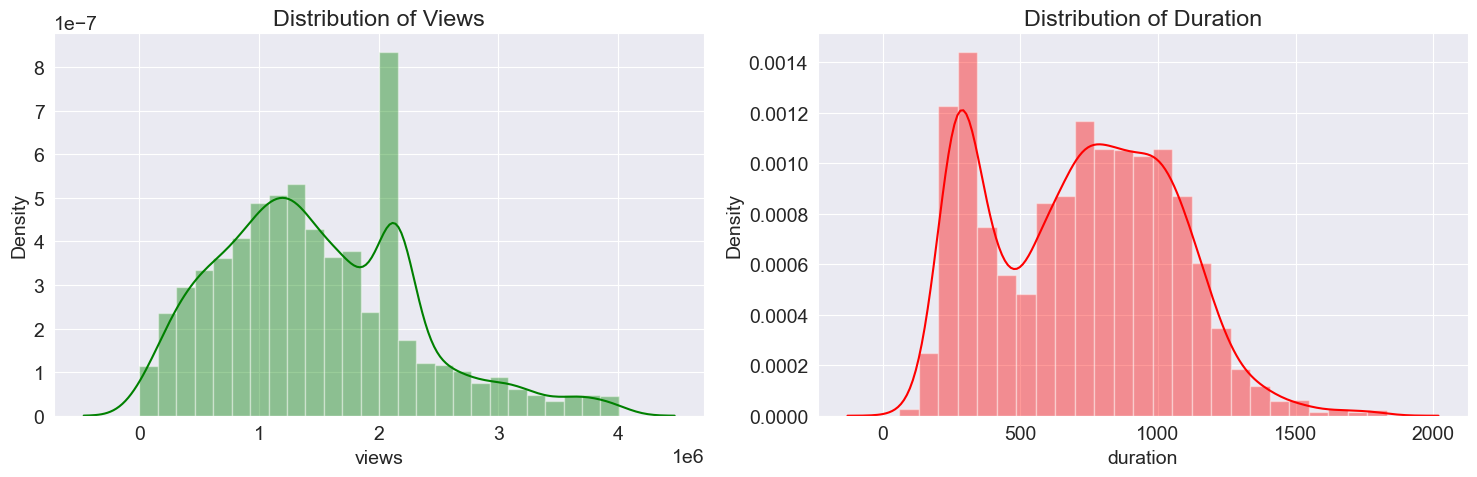

In [251]:
# after fill outliers with mean... distribution graph of columns views and duration

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['views'], color='green', ax=axs[0])
axs[0].set_title('Distribution of Views')

sns.distplot(df['duration'], color='red', ax=axs[1])
axs[1].set_title('Distribution of Duration')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A box plot displays the distribution of a dataset through five summary statistics: the median , the interquartile range , and the lower and upper quartiles . It also includes "whiskers" that extend from the box to show the range of the data within a certain threshold.  'Views' and 'duration' can help to understand the distribution and spread of these features, identify potential outliers, and make informed decisions about data preprocessing and model training strategies.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

After fill outliers with mean views column is little bit right skewed with normal distribution.

And for duration column are bi-model type distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of views and duration .

#### Chart - 6

In [252]:
# Chart - 6 visualization code
# change duration in sec. to min.

df['duration'] = df['duration'] / 60

In [253]:
#check skewness of our numerical columns

#df.skew()

numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlmap = numeric_df.skew()


In [254]:
# plot 3D scatter plot of comments, duration and our target column views using plotly library.

fig = px.scatter_3d(df, x=df['duration'], y=df['comments'], z=df['views'])

fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

In a 3D scatter plot, each data point is represented by a marker at a specific point in a three-dimensional space, with each axis corresponding to a different variable.A 3D scatter plot can be a valuable visualization tool in supervised learning tasks for the Feature Relationships ,Feature Selection ,Outlier Detection ,Visualization of Model Output ,Interaction Effects .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can clearly see that when comments value high in 600 to 1000 side views value also increases.

But in duration time increase or decrease there are not any changes in views values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of views,comments and duration .

#### Chart - 7

In [255]:
# Chart - 7 visualization code
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

df['speaker_popularity'] = ""
df.loc[df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
df.loc[(df['views'] > 500000) & (df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
df.loc[(df['views'] > 1500000) & (df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
df.loc[(df['views'] > 2500000) & (df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
df.loc[df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset

df.sample(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,speaker_popularity
2420,2800,Science didn't understand my kids' rare diseas...,Sharon Terry,{0: 'Sharon Terry'},{0: ['citizen biomedical researcher']},{0: 'Sharon Terry is developing ways for ordin...,1358227.0,2016-11-30,2017-06-15,TEDMED 2016,en,"['ar', 'de', 'en', 'es', 'fr', 'hu', 'ja', 'ko...",19.0,15.033333,"['bioethics', 'children', 'biology', 'collabor...","{2627: ""What happens when you have a disease d...",https://www.ted.com/talks/sharon_terry_science...,"Meet Sharon Terry, a former college chaplain a...",The best Christmas my children ever had was al...,avg_popular
524,658,Life lessons from an ad man,Rory Sutherland,{0: 'Rory Sutherland'},{0: ['advertising guru']},{0: 'Rory Sutherland stands at the center of a...,3300658.0,2009-07-23,2009-10-14,TEDGlobal 2009,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",296.0,16.650000,"['advertising', 'business', 'consumerism', 'cr...","{197: 'Design and destiny', 419: 'The price of...",https://www.ted.com/talks/rory_sutherland_life...,Advertising adds value to a product by changin...,"This is my first time at TED. Normally, as an ...",high_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

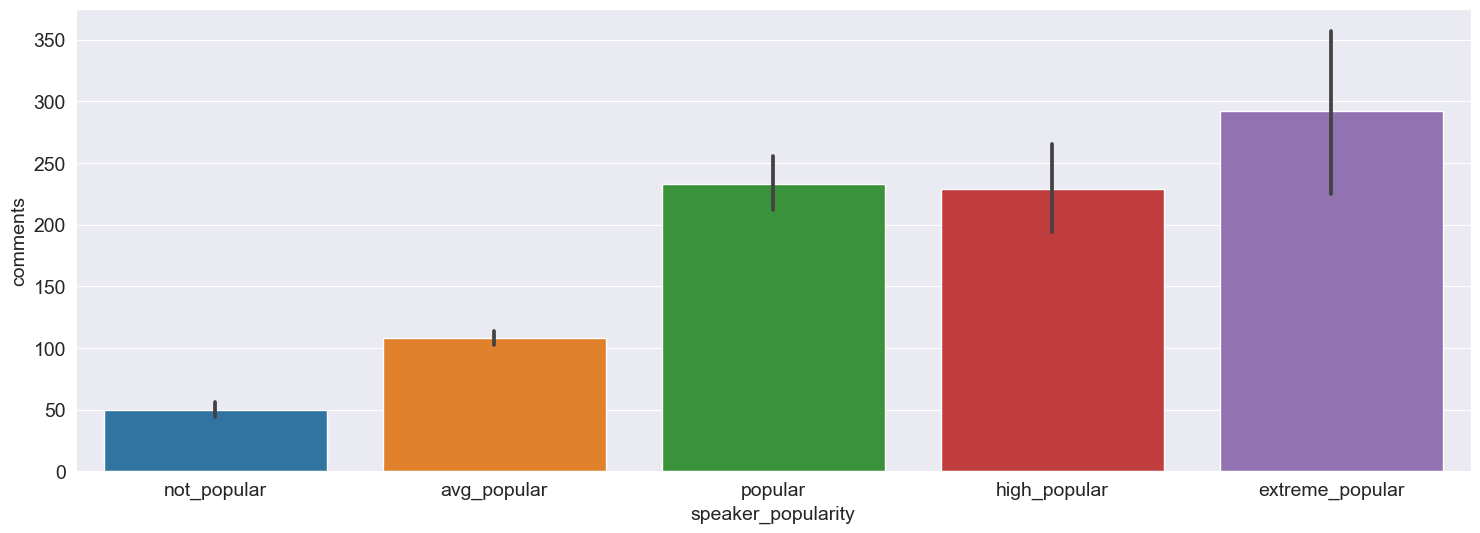

In [256]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])

##### 1. Why did you pick the specific chart?

Answer Here.

Bar plots are often used to visualize relationships between categorical and numerical variables . This type of chart can help to understand how a categorical variable (speaker popularity) influences a numerical outcome variable (average comments). It allows  to compare the average comment counts across different levels of speaker popularity, providing insights into potential trends or patterns.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can observe that this speaker popularity column has a strong correlation with the comments column in an ordinal manner. This means that as the number of comments on a TED Talk video increases, the popularity of the speaker also tends to increase.


Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.


However, there are no other good columns available in the dataset that can be modified or used to create new columns for better prediction models.

To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems for instructors in ALMAbetter.

These ratings can help in understanding the quality of the talk and the popularity of the speaker, which could be important factors in predicting the number of views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of comments and speaker popularity .

#### Chart - 8

In [257]:
# Chart - 8 visualization code
# add new column available_languages using existing column available_lang

df['available_languages'] = df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(df['available_languages'])

,available_languages
0,270
1,303
2,165
3,219
4,387
...,...
4000,6
4001,27
4002,6
4003,6


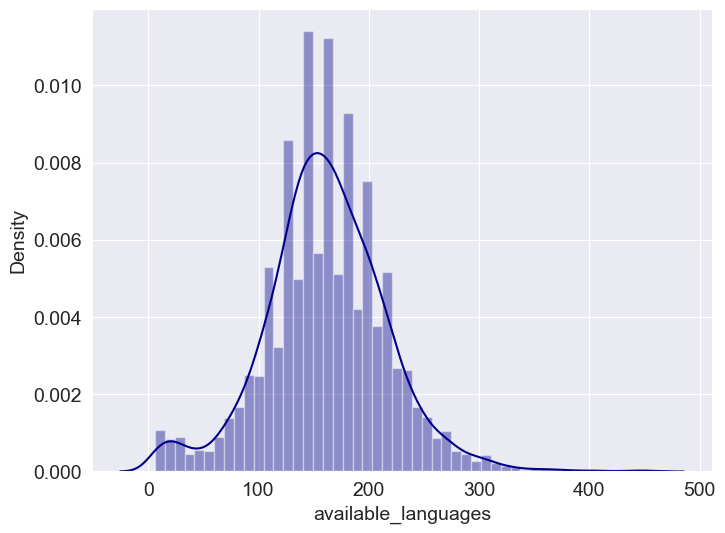

In [258]:
# check the distribution of this new column available_languages

plt.figure(figsize=(8,6))
sns.distplot(df['available_languages'],color = 'darkblue')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Histogram is used to visualize the distribution of a continuous variable, in this case, the 'available_languages' feature from your TED Talk dataset. The x-axis represents the range of available languages, while the y-axis shows the frequency or density of talks for each language range.

Histograms are commonly used in data analysis for below reasons:

Data Distribution: Histograms allow you to visualize the distribution of a single variable, helping you understand how values are spread across different ranges.

Feature Insights: By examining the shape of the histogram, you can gain insights into the concentration or dispersion of data points, potential outliers, and modes within the data.

Feature Engineering: Histograms can guide feature engineering decisions, such as grouping or categorizing data points based on their distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Little-bit of right skewed and in-middle also more values...we can use function transformation or power transformation on later part when we make pipeline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of available languages .

#### Chart - 9

In [259]:
# Chart - 9 visualization code
import ast

# use duplicate dataframe for topics analysis
df = df.copy()

df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df = df.drop('topics', axis=1).join(s)

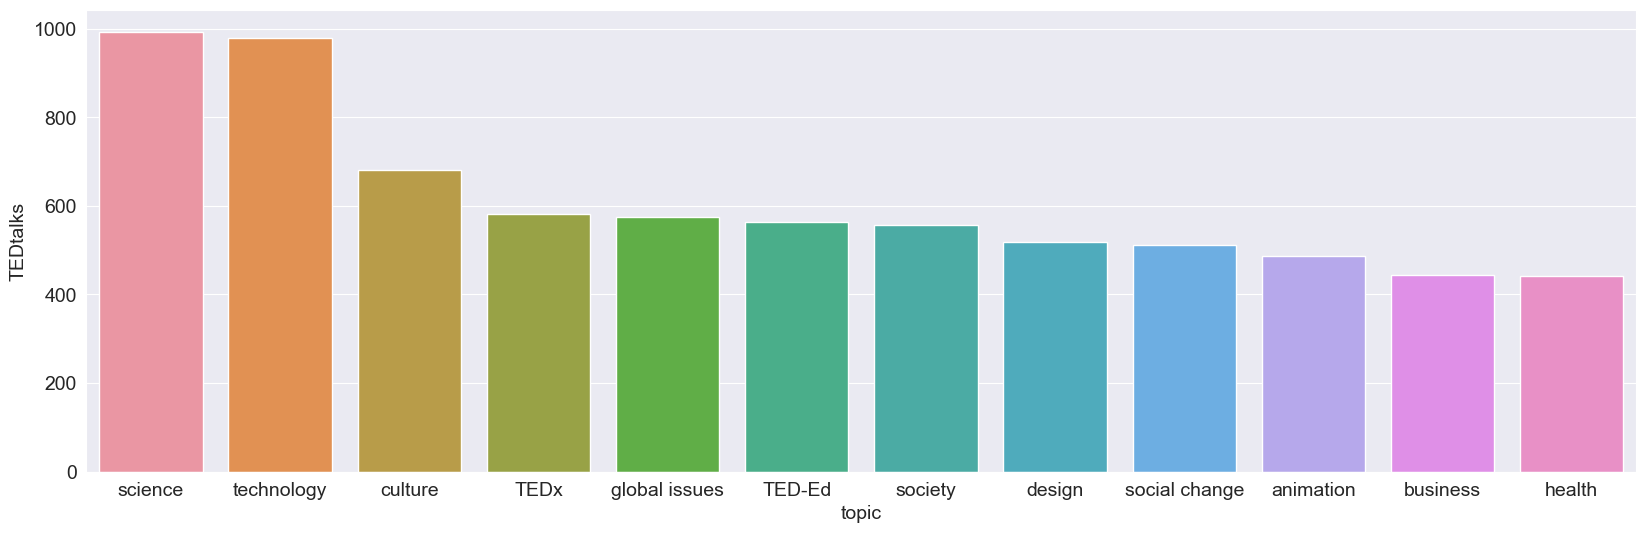

In [260]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar plots are  used to visualize relationships between categorical and numerical variables . This type of chart can help to understand how a categorical variable (topic) influences a numerical outcome variable (TEDtalks). Each bar on the chart corresponds to a topic, and its height reflects the number of TED Talks related to that topic. Bar charts are commonly used to display categorical data and compare the frequency or count of different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

As expected, science and Technology is the most popular topics for talks. Culture and Global Issues are also the popular topics respectively.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes the gained insights help creating a positive business impact by the help of TEDtalks and topic .

#### Chart - 10

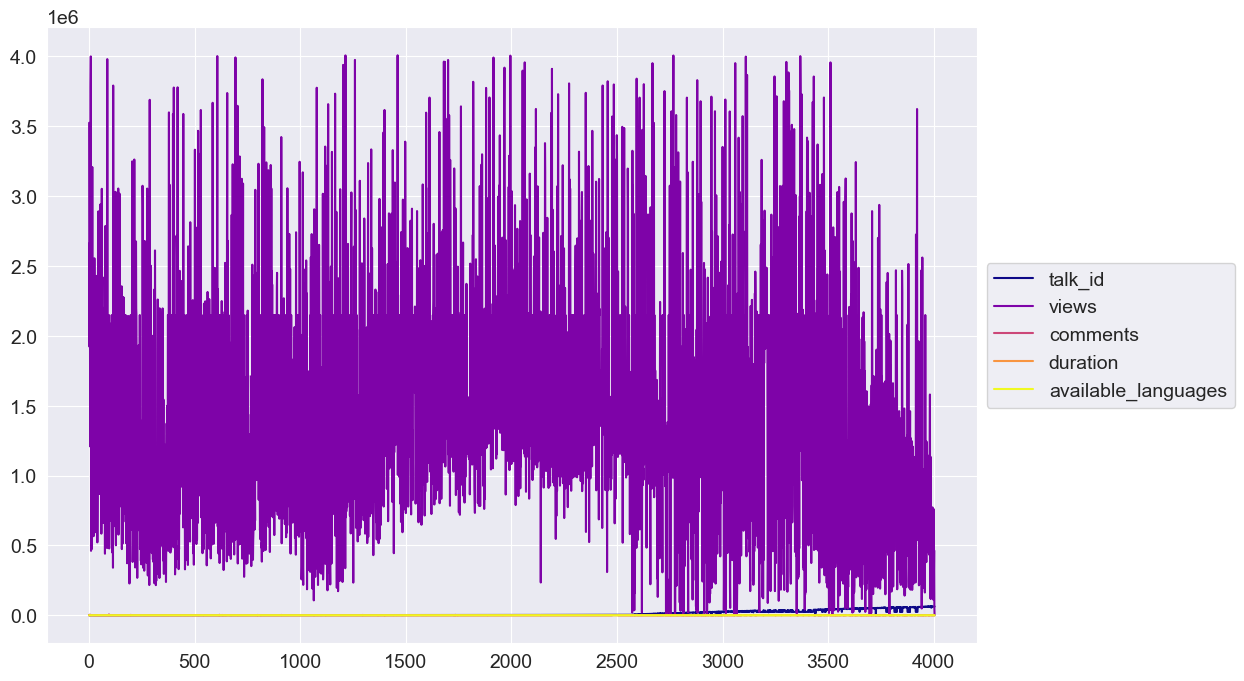

In [261]:
# Chart - 10 visualization code
# plot line charts for top 8 topics perform over the year

df.plot(kind='line', stacked=False, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

In a line plot, individual data points are connected by straight lines, allowing you to observe how a variable changes over a continuous or ordered range. The 'plasma' colormap is used to color the lines, making it easier to distinguish different lines if multiple lines are plotted.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Insights shows how the target variable (views) changes in response to changes in the predictor variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


The line plot shows a positive trend where views increase over time or with certain feature values, this could indicate a positive business impact.

Decreasing views over time or under certain conditions could be due to changing audience preferences or shifts in societal interests. Identifying and understanding this trend could prompt organizers to adapt content strategies, explore new topics, or incorporate fresh approaches to re-engage the audience.

#### Chart - 11

In [262]:
df.sample(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,related_talks,url,description,transcript,speaker_popularity,available_languages,topic
2275,2615,Help for kids the education system ignores,Victor Rios,{0: 'Victor Rios'},"{0: ['educator', 'author']}",{0: 'Victor Rios seeks to uncover how to best ...,1490712.0,2015-11-02,2016-11-17,TED Talks Live,...,"['ar', 'ca', 'de', 'en', 'es', 'fa', 'fr', 'fr...",45.0,11.883333,"{2579: ""Let's teach for mastery -- not test sc...",https://www.ted.com/talks/victor_rios_help_for...,"Define students by what they contribute, not w...","For over a decade, I have studied young people...",avg_popular,171,society
3060,29185,3 questions to ask yourself about everything y...,Stacey Abrams,{0: 'Stacey Abrams'},{0: ['politician']},{0: 'Former Georgia House Democratic Leader St...,3950307.0,2018-11-28,2018-12-04,TEDWomen 2018,...,"['ar', 'bg', 'de', 'en', 'es', 'fa', 'fr', 'he...",68.0,12.633333,{3269: 'The revolutionary power of diverse tho...,https://www.ted.com/talks/stacey_abrams_3_ques...,How you respond after setbacks is what defines...,When I was in high school at the age of 17 — I...,extreme_popular,135,poverty


In [263]:
df.sample(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,related_talks,url,description,transcript,speaker_popularity,available_languages,topic
3253,36214,The chaotic brilliance of artist Jean-Michel B...,Jordana Moore Sageese,{0: 'Jordana Moore Sageese'},NaN,NaN,373761.0,2019-02-28,2019-02-28,TED-Ed,...,"['ar', 'el', 'en', 'es', 'fr', 'he', 'hu', 'it...",NaN,4.35,"{28418: 'Who decides what art means? ', 35903:...",https://www.ted.com/talks/jordana_moore_sagges...,Like Beat writers who composed their work by s...,A sky blue canvas ripped open by an enormous s...,not_popular,129,culture


<Axes: >

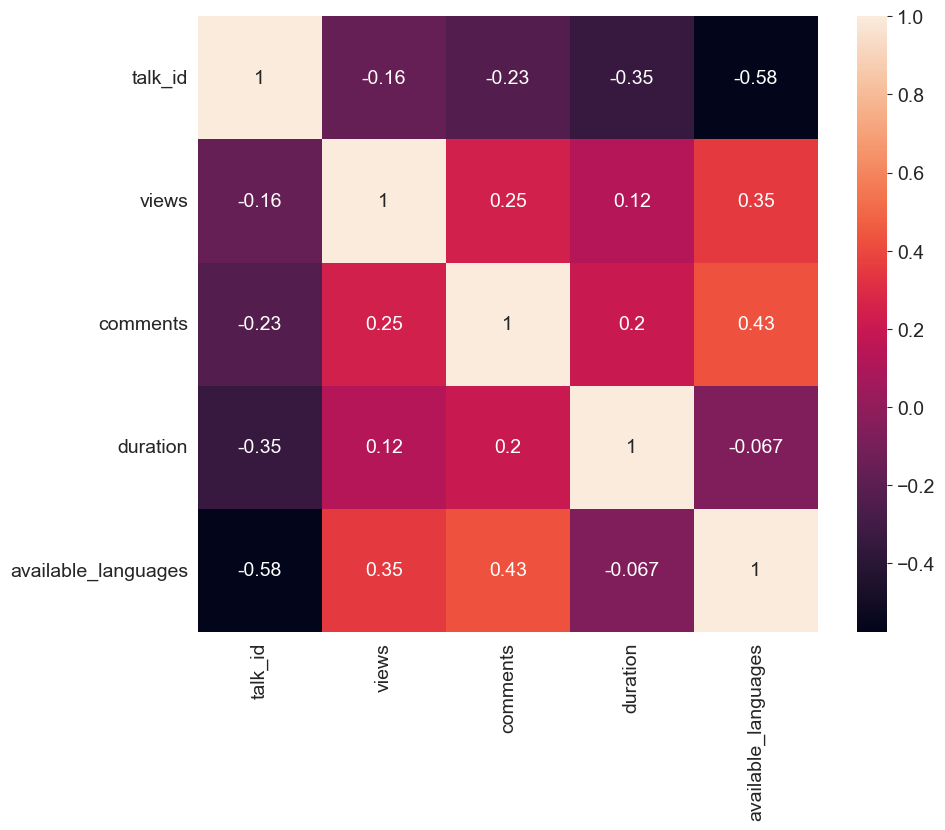

In [264]:
# Chart - 11 visualization code
# Plotting correlation  matrix for all features with respect to target variable
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlmap = numeric_df.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

##### 1. Why did you pick the specific chart?

Answer Here.

This type of chart is used to visualize the correlations between numerical features in a dataset. Each cell in the heatmap represents the correlation coefficient between two features, with color intensity indicating the strength and direction of the correlation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Comments and available_languages are most correlated with views column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the correlation heatmap can potentially have a positive business impact as it shows  a strong positive correlation between the number of comments and the number of views, it suggests that talks that receive more comments also tend to attract more views.

#### Chart - 12

In [265]:
# Chart - 12 visualization code
# use Yeo - Johnson Transform for views column and then we train test split the data

pt = PowerTransformer()
df['views'] = pt.fit_transform(pd.DataFrame(df['views']))

In [266]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlmap = numeric_df.skew()

## **`Train, Test and Split`**

In [267]:
# split the Dataset into independent(x) and dependent(y) Dataset

X =df.drop(columns=['views'])
y =df['views']
# display independent variables dataframe

X

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,comments,duration,related_talks,url,description,transcript,speaker_popularity,available_languages,topic
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",extreme_popular,270,alternative energy
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",extreme_popular,270,cars
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",extreme_popular,270,climate change
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",extreme_popular,270,culture
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",extreme_popular,270,environment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,4.683333,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,not_popular,6,oceans
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,4.683333,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,not_popular,6,science
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,4.683333,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,not_popular,6,education
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,4.683333,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a

In [268]:
# display independent variables dataframe

y

0       2.113090
0       2.113090
0       2.113090
0       2.113090
0       2.113090
          ...   
4004   -2.942452
4004   -2.942452
4004   -2.942452
4004   -2.942452
4004   -2.942452
Name: views, Length: 31700, dtype: float64

In [269]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(25360, 20)
(6340, 20)


In [270]:
df.sample(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,related_talks,url,description,transcript,speaker_popularity,available_languages,topic
2194,2546,How to grow a forest in your backyard,Shubhendu Sharma,{0: 'Shubhendu Sharma'},{0: ['eco-entrepreneur']},{0: 'Shubhendu Sharma creates afforestation me...,1.328216,2016-05-18,2016-07-14,TED@BCG Paris,...,"['ar', 'bg', 'cs', 'da', 'de', 'en', 'es', 'fa...",74.0,9.183333,"{409: 'The mysterious lives of giant trees', 9...",https://www.ted.com/talks/shubhendu_sharma_how...,Forests don't have to be far-flung nature rese...,This is a man-made forest. It can spread over ...,high_popular,231,ecology
2671,10681,"How to have a healthier, positive relationship...",Tiffany Kagure Mugo,"{0: 'Tiffany Kagure Mugo', 1: 'Siphumeze Khund...","{0: ['curator', 'blogger', 'media consultant']...","{0: 'The curator of HOLAAfrica, Tiffany Kagure...",-0.074492,2017-11-01,2018-02-22,TEDWomen 2017,...,"['ca', 'en', 'es', 'fa', 'fr', 'he', 'it', 'ko...",8.0,11.616667,{2708: 'What young women believe about their o...,https://www.ted.com/talks/tiffany_kagure_mugo_...,From our fear of women's bodies to our sheepis...,[This talk contains mature content Viewer disc...,avg_popular,93,human body


# **Data pre-processing using ColumnTransformer for make Pipeline**

In [271]:
# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.

step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,3,5]),
    ('col_tnf1', PowerTransformer(),[0,1,3]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[4,6]),
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]),[2])
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

## **`Linear Regression`**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression :-**

Simple linear regression involves just two variables - one dependent variabl(y) and one independent variable(x). The algorithm tries to learn the best values for the slope (m) and intercept (b) of a straight line that can accurately predict the dependent variable based on the independent variable. Linear regression can predict the output by fitting a straight line in the case of simple linear regression.

y=mx+b

**Multivariable regression :-**

Multivariable regression, on the other hand, involves more than two variables. It's used when there are multiple independent variables that can be used to predict a single dependent variable. In this case, the algorithm tries to learn the best values for the weights (w1, w2, w3, etc.) associated with each independent variable, in order to accurately predict the dependent variable.
Linear regression can predict the output by fitting a straight line in the case of Multivariable regression

f(x,y,z)=w1x+w2y+w3z

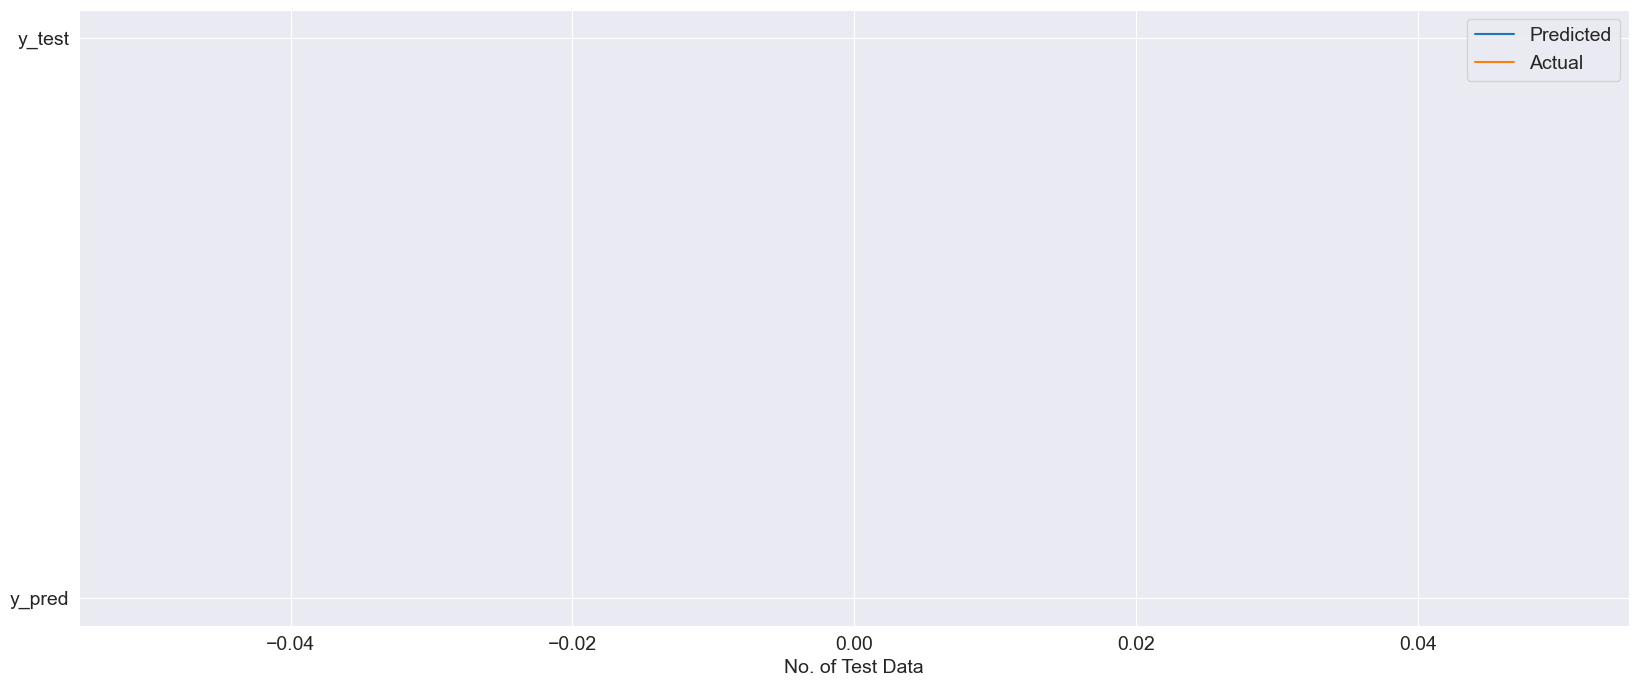

In [272]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load or define your dataset
# X, y = load_your_dataset()


# Define your preprocessing step
step1 = StandardScaler()

# Define your linear regression model
step2 = LinearRegression()


# Create the pipeline
pipe1 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


# Plot the figure
plt.figure(figsize=(20, 8))
plt.plot('y_pred')
plt.plot(np.array('y_test'))
plt.legend(["Predicted", "Actual"])
plt.xlabel('No. of Test Data')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [273]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [274]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [276]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

To help the client achieve their business objectives through the insights gained from the TED Talks Views Prediction project, we can  recommend the following strategies:

Data-Driven Content Strategy:
Use predictive models to identify key factors driving TED Talk popularity. Tailor content themes, speaker profiles, and presentation styles to match audience preferences, increasing the chances of engaging a wider viewership.

Strategic Marketing Allocation:
Prioritize marketing efforts for talks with higher predicted views. Allocate resources efficiently to maximize impact and viewership for selected talks.

Personalized Engagement:
Segment the audience based on data insights to personalize outreach. Adapt communication strategies and content recommendations to cater to diverse viewer preferences.

Empower Speakers:
Provide speakers with insights to enhance their presentations. Share data-backed suggestions on content focus, delivery, and engagement strategies.

Continuous Iteration:
Regularly update models with new data to adapt to evolving trends and preferences. Stay agile in refining content and strategies for maximum impact.

Collaborative Innovation:
Foster interdisciplinary collaboration among data, content, and marketing teams. Encourage experimentation and innovation to push boundaries and create engaging talks.

By leveraging data insights, our client can optimize content creation, marketing, and engagement strategies, leading to increased TED Talk viewership and audience engagement.







# **Conclusion**

Write the conclusion here.

In conclusion, our project aimed to predict the number of views for TED Talks using a combination of machine learning techniques. By analyzing and preprocessing the dataset, we gained insights into the relationships between various features such as the number of comments, duration, and the speaker's occupation. Through exploratory data analysis and correlation analysis, we identified factors that have a significant impact on the popularity of TED Talks.

The project's findings have important implications for both TED organizers and speakers. Organizers can use the predictive models to estimate the potential reach and impact of a TED Talk before it's even delivered. This information can guide decisions about speaker selection, topic promotion, and audience engagement strategies. On the other hand, speakers can gain insights into the factors that contribute to the popularity of their talks. By understanding which aspects resonate most with viewers, speakers can refine their presentations and enhance their effectiveness.As technology and data continue to evolve, we can anticipate even more accurate and robust predictive models that take into account a wider range of variables. By merging data science with the art of communication, we have taken a step towards unlocking the secrets behind the captivating talks that inspire and educate millions on the TED stage.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***